除非特别指定,输入江北转换为float64

In [4]:
import numpy as np

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

In [6]:
from sklearn import random_projection

transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

In [28]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()

clf.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
list(clf.predict(iris.data[45:60]))

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [22]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
list(clf.predict(iris.data[45:60]))

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor']

### 再次训练和跟新参数

估计器的超参数可以通过sklearn.pipleline.PipleLine.set_params方法在实例化之后进行更新,调用fit()多次将覆盖以前的fit()所学到的参数

In [30]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [33]:
clf.set_params(kernel='rbf').fit(X, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

这里,估计器被SVC()构造之后,默认内核rbf首先被改变到linear,然后改回到rbf重新训练估计器并进行第二次预测

In [34]:
clf.predict(X_test)

array([0, 0, 0, 1, 0])

## 多分类和多标签拟合

当使用多分类器时,执行的学习和预测任务取决于参与训练的目标数据的格式

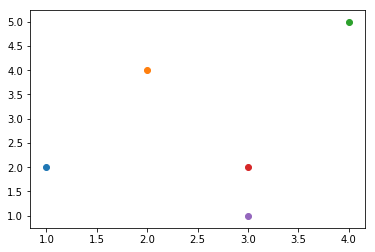

array([0, 0, 1, 1, 1])

In [65]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

% matplotlib inline
import matplotlib.pyplot as plt

# print(len(X))
for i in range(0, 5):
    plt.scatter(X[i][0], X[i][1])
plt.show()

classif = OneVsOneClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)


In [72]:
# classif1 = OneVsOneClassifier(estimator=SVC(random_state=0))
# y = LabelBinarizer().fit_transform(y)
# classif1.fit(X, y).predict(X)

In [71]:
# from sklearn.preprocessing import MultiLabelBinarizer
# 
# y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
# y = MultiLabelBinarizer().fit_transform(y)
# classif.fit(X, y).predict(X)

In [70]:
import sklearn
sklearn.__version__

'0.19.1'